In [1]:
import pandas as pd
import numpy as np
import re
import random
import requests
import bs4 
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use("ggplot")

sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf', size= 20).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False


In [27]:
word = '산재보험'
url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&q='+word
r = requests.get(url)
bs4_r = bs4.BeautifulSoup(r.text,'lxml')

In [28]:
bs4_r.text

'\n\n\n\n\n\n\n\n\n\n\n\n산재보험 – Daum 검색\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n본문 바로가기\n메뉴 바로가기\n실시간이슈 바로가기\n\n \n산재보험\n\n\n\n\n\n\n\n검색\n\n\n\n검색폼\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n한글입력기\n검색\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n선택된 항목\n통합검색\n\n\n\n\n백과사전\n새창\n\n\n\n\n\n사이트\n\n\n\n\n\n어학사전\n새창\n\n\n\n\n\n블로그\n\n\n\n\n카페\n\n\n\n\n뉴스\n\n\n\n\n브런치\n\n\n\n\n\n더보기/접기\n\n\n\n\n이미지\n\n\n\n\n동영상\n\n\n\n\n웹문서\n\n\n\n\n\n지도\n새창\n\n\n\n\n\n\n쇼핑\n새창\n\n\n\n\n\n책\n\n\n\n\n멜론뮤직\n\n\n\n\n카카오스토리\n\n\n\n\n\n\n\n기간전체\n\n\n\n\n\n\n\n기간전체\n\n\n\n\n최근 1일\n\n\n\n\n최근 1주\n\n\n\n\n최근 1개월\n\n\n\n\n최근 6개월\n\n\n\n\n최근 1년\n\n\n\n\n직접입력\n\n\n\n\n\n\n\n\n\n\n적용\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n검색 본문\n\n\n\n\n\n제안 검색어\n\n도움말\n\n\n근재보험\n산재처리\n산재 보상\n산재보험 보상\n산재보험 신청\n고용보험\n고용산재보험\n산재보험 신청방법\n산재보험 보상범위\n산재보험 계산법\n산재보험 요율표\n산재보험료\n산재보험료율\n고용산재보험 토탈서비스\n산재보험공단\n산재보험법\n산재보험 가입증명서\n산재보험 가입대상\n산재 고용토탈서비스\n산재보험 가입절차\n산재보험료 계산방법\n산재보험 이란\n산재보험 가입\n산재보험 처리\n산재보험 급여\n2019년 산재보험요율\n산재보험 토탈서비스\n산재보험 관리공단\n산재보험 납

In [29]:
div_inner = bs4_r.find("div", class_ = 'list_keyword type2')
div_inner

<div class="list_keyword type2" data-w="tot" id="recomm_lists_top">
<h2 class="tit">
제안 <span class="screen_out">검색어</span>
<a class="link_help" href="http://cs.daum.net/faq/15/14957.html?faqId=35220" onclick='smartLog(this, "dc=V5A&amp;e=99", event);' target="_blank">
<span class="ico_rwd ico_help">도움말</span>
</a>
</h2>
<span class="wsn"><a class="keyword" data-log="dc=V5A&amp;pg=1&amp;r=1&amp;p=1&amp;e1=%EA%B7%BC%EC%9E%AC%EB%B3%B4%ED%97%98&amp;rc=1" href="?w=tot&amp;m=&amp;q=%EA%B7%BC%EC%9E%AC%EB%B3%B4%ED%97%98&amp;nzq=%EC%82%B0%EC%9E%AC%EB%B3%B4%ED%97%98&amp;DA=V5A">근재보험</a></span>
<span class="wsn"><a class="keyword" data-log="dc=V5A&amp;pg=1&amp;r=2&amp;p=1&amp;e1=%EC%82%B0%EC%9E%AC%EC%B2%98%EB%A6%AC&amp;rc=1" href="?w=tot&amp;m=&amp;q=%EC%82%B0%EC%9E%AC%EC%B2%98%EB%A6%AC&amp;nzq=%EC%82%B0%EC%9E%AC%EB%B3%B4%ED%97%98&amp;DA=V5A">산재처리</a></span>
<span class="wsn"><a class="keyword" data-log="dc=V5A&amp;pg=1&amp;r=3&amp;p=1&amp;e1=%EC%82%B0%EC%9E%AC%20%EB%B3%B4%EC%83%81&amp;rc=1" hre

In [30]:
## schema : article ->div ->span
# ㅇ예외처리 ex) 중랑구 피부과 class명 다름, 청주 메어리벳이원 : 연관검색어가 없음 -> pass

try:
    div_inner = bs4_r.find("div", class_='list_keyword type2') # 연관 검색어가 잇는 태그 ,class ㅍ파싱
    span_list =div_inner.find_all('span', class_='wsn')

except: # 연관 검색어 태그가 다른 경우, 없는 경우에 대해 예외 처리
    if pd.isna(div_inner):
        try:
            div_inner = bs4_r.find('div', class_ = 'list_keyword')
            span_list = div_inner.find_all('span', class_='wsn')
            
        except:
            print(word_list[i], '연관 검색어가 없습니다.')
            span_list = [] # 공백 리스트로 넘겨줌 

In [31]:
span_list

[<span class="wsn"><a class="keyword" data-log="dc=V5A&amp;pg=1&amp;r=1&amp;p=1&amp;e1=%EA%B7%BC%EC%9E%AC%EB%B3%B4%ED%97%98&amp;rc=1" href="?w=tot&amp;m=&amp;q=%EA%B7%BC%EC%9E%AC%EB%B3%B4%ED%97%98&amp;nzq=%EC%82%B0%EC%9E%AC%EB%B3%B4%ED%97%98&amp;DA=V5A">근재보험</a></span>,
 <span class="wsn"><a class="keyword" data-log="dc=V5A&amp;pg=1&amp;r=2&amp;p=1&amp;e1=%EC%82%B0%EC%9E%AC%EC%B2%98%EB%A6%AC&amp;rc=1" href="?w=tot&amp;m=&amp;q=%EC%82%B0%EC%9E%AC%EC%B2%98%EB%A6%AC&amp;nzq=%EC%82%B0%EC%9E%AC%EB%B3%B4%ED%97%98&amp;DA=V5A">산재처리</a></span>,
 <span class="wsn"><a class="keyword" data-log="dc=V5A&amp;pg=1&amp;r=3&amp;p=1&amp;e1=%EC%82%B0%EC%9E%AC%20%EB%B3%B4%EC%83%81&amp;rc=1" href="?w=tot&amp;m=&amp;q=%EC%82%B0%EC%9E%AC%20%EB%B3%B4%EC%83%81&amp;nzq=%EC%82%B0%EC%9E%AC%EB%B3%B4%ED%97%98&amp;DA=V5A">산재 보상</a></span>,
 <span class="wsn"><a class="keyword" data-log="dc=V5A&amp;pg=1&amp;r=4&amp;p=1&amp;e1=%EC%82%B0%EC%9E%AC%EB%B3%B4%ED%97%98%20%EB%B3%B4%EC%83%81&amp;rc=1" href="?w=tot&amp;m=&amp;q

In [32]:
related_word_list = []
for i, word in enumerate(span_list):
    related_word_list.append(span_list[i].text) #parsing 해온 연관검색어 부분에서 text만 word list에 append

In [33]:
related_word_list

['근재보험',
 '산재처리',
 '산재 보상',
 '산재보험 보상',
 '산재보험 신청',
 '고용보험',
 '고용산재보험',
 '산재보험 신청방법',
 '산재보험 보상범위',
 '산재보험 계산법',
 '산재보험 요율표',
 '산재보험료',
 '산재보험료율',
 '고용산재보험 토탈서비스',
 '산재보험공단',
 '산재보험법',
 '산재보험 가입증명서',
 '산재보험 가입대상',
 '산재 고용토탈서비스',
 '산재보험 가입절차',
 '산재보험료 계산방법',
 '산재보험 이란',
 '산재보험 가입',
 '산재보험 처리',
 '산재보험 급여',
 '2019년 산재보험요율',
 '산재보험 토탈서비스',
 '산재보험 관리공단',
 '산재보험 납부',
 '산업재해 보험']

In [34]:
df = pd.DataFrame()
df['sub_word'] = related_word_list
#df['sup_word'] = span_list[0]
df

,sub_word
0,근재보험
1,산재처리
2,산재 보상
3,산재보험 보상
4,산재보험 신청
5,고용보험
6,고용산재보험
7,산재보험 신청방법
8,산재보험 보상범위
9,산재보험 계산법


In [49]:
def crawling_related_word(word_list, n):
    if n==0:
        print("크롤링 종료")
    else:
        merge_df = pd.DataFrame()
        for i in range(len(word_list)):
            temp_df = pd.DataFrame()
            temp_list = []
            url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&q='+word_list[i]
            r = requests.get(url)
            bs4_r = bs4.BeautifulSoup(r.text, 'lxml')
            
            print(word_list[i])
            div_inner = bs4_r.find("div", class_ = 'list_keyword type2')
            
            try:
                div_inner= bs4_r.find('div', class_ = 'list_keyword type2')
                span_list = div_inner.find_all('span', class_='wsn')
            
            except:
                if pd.isna(div_inner):
                    try:
                        div_inner = bs4_r.find("div", class_='list_keyword')
                        span_list = div_inner.find_all("span", class_='wsn')
                    except:
                        print(word_list[i], "연관 검색어가 없습니다.")
                        span_list= []
                        
            if len(span_list) ==0:
                pass
            else:
                for k,word in enumerate(span_list):
                    temp_list.append(span_list[k].text)
                
                temp_df['sub_word'] = temp_list
                temp_df['sup_word'] = word_list[i]
                
                temp_df = pd.DataFrame(temp_df, columns = ['sup_word', 'sub_word'])
                
                merge_df = pd.concat([merge_df,temp_df], axis=0)
                
        # 해당차수 크롤링 ㅕㄱㄹ과 사전에 저장    
        dictionary[n] = merge_df
            
        # 재귀 호출부분
        pass_word_list = merge_df['sub_word'].values
            
        print("다음 크롤링을 시작합니다.")
        crawling_related_word(pass_word_list,n-1)

# 재귀 크롤링


In [130]:
dictionary = {}
word_list= ['산재보험']
crawling_related_word(word_list, 3)

산재보험
다음 크롤링을 시작합니다.
근재보험
산재처리
산재 보상
산재보험 보상
산재보험 신청
고용보험
고용산재보험
산재보험 신청방법
산재보험 보상범위
산재보험 계산법
산재보험 요율표
산재보험료
산재보험료율
고용산재보험 토탈서비스
산재보험공단
산재보험법
산재보험 가입증명서
산재보험 가입대상
산재 고용토탈서비스
산재보험 가입절차
산재보험료 계산방법
산재보험 이란
산재보험 가입
산재보험 처리
산재보험 급여
2019년 산재보험요율
산재보험 토탈서비스
산재보험 관리공단
산재보험 납부
산업재해 보험
다음 크롤링을 시작합니다.
상해보험
한화손해보험
현대해상
산재보험
삼성화재
단체 여행자보험
영업배상 책임보험
동부화재
db 손해보험
행사 보험
단체보험
근재보험 가입
체육시설업자 배상책임보험
근로자 재해보험
근재보험 가입 방법
전문건설공제조합
해외 근재보험
근재보험이란
근로재해보험
근재보험 보상
삼성화재 근재보험
근재보험료
근재보험 요율
현대해상 근재보험
영업배상 책임보험 이란
동부화재 근재보험
근재보험 가입여부
산재보험 보상금
근재보험 청구
근재보험 산재보험
산재처리 방법
산재처리 기준
산재처리 기간
산재처리시 회사불이익
공상처리와 산재처리
산재보험
산재처리시 급여는어떻게되나요
근로복지공단
산재처리 보상기준
산재처리 기한
근로복지공단 산재신청
산재처리 과정
산재보험공단
산재신청 절차
질병 산재처리
고용노동부
산재사고 회사 불이익
산재처리란
일용직 산재처리
산재처리 신고기간
산재보험
산재보험 보상금
산업재해 보상
산재 소송
임금체불
산재 보상후 민사소송
산재보험 신청기간
산재전문 변호사
산재보험 보상범위
산재 사망보상금
산재보험법
화물차 산재보험
산재 상담
산재처리 기준
산재보험 관리공단
산재보험 가입방법
산재 보상 절차
산재 가입대상
산재보험 신청
산재보험 보상범위
산재처리 기준
삼성 상해보험
산재보험 보상기간
산재보험 신청기간
산재보험 신청서류
건강보험 계산
산재보험 가입대상 제외
근로복지공단
산재보험 홈페이지
산재보험법
산재보험 보상범위
산재 요양신청서
산재신청 절차
부

In [132]:
dictionary[3]

,sup_word,sub_word
0,산재보험,근재보험
1,산재보험,산재처리
2,산재보험,산재 보상
3,산재보험,산재보험 보상
4,산재보험,산재보험 신청
5,산재보험,고용보험
6,산재보험,고용산재보험
7,산재보험,산재보험 신청방법
8,산재보험,산재보험 보상범위
9,산재보험,산재보험 계산법


In [133]:
dictionary[3].head()


,sup_word,sub_word
0,산재보험,근재보험
1,산재보험,산재처리
2,산재보험,산재 보상
3,산재보험,산재보험 보상
4,산재보험,산재보험 신청


In [134]:
dict3 = dictionary[3].rename({'sup_word':'sup_word', 'sub_word':'sub_word1'},axis='columns')
dict3.head()

,sup_word,sub_word1
0,산재보험,근재보험
1,산재보험,산재처리
2,산재보험,산재 보상
3,산재보험,산재보험 보상
4,산재보험,산재보험 신청


In [135]:
dictionary[2].head()

,sup_word,sub_word
0,근재보험,상해보험
1,근재보험,한화손해보험
2,근재보험,현대해상
3,근재보험,산재보험
4,근재보험,삼성화재


In [136]:
dict2 = dictionary[2].rename({'sup_word':'sub_word1', 'sub_word':'sub_word2'},axis='columns')
dict2.head()

,sub_word1,sub_word2
0,근재보험,상해보험
1,근재보험,한화손해보험
2,근재보험,현대해상
3,근재보험,산재보험
4,근재보험,삼성화재


In [137]:
dictionary[1].head()

,sup_word,sub_word
0,상해보험,운전자보험
1,상해보험,실비보험
2,상해보험,화재보험
3,상해보험,생명보험
4,상해보험,손해보험


In [138]:
dict1 = dictionary[1].rename({'sup_word':'sub_word2', 'sub_word':'sub_word3'},axis='columns')
dict1.head()

,sub_word2,sub_word3
0,상해보험,운전자보험
1,상해보험,실비보험
2,상해보험,화재보험
3,상해보험,생명보험
4,상해보험,손해보험


In [139]:
dict3

,sup_word,sub_word1
0,산재보험,근재보험
1,산재보험,산재처리
2,산재보험,산재 보상
3,산재보험,산재보험 보상
4,산재보험,산재보험 신청
5,산재보험,고용보험
6,산재보험,고용산재보험
7,산재보험,산재보험 신청방법
8,산재보험,산재보험 보상범위
9,산재보험,산재보험 계산법


In [140]:
dict2

,sub_word1,sub_word2
0,근재보험,상해보험
1,근재보험,한화손해보험
2,근재보험,현대해상
3,근재보험,산재보험
4,근재보험,삼성화재
...,...,...
2,산업재해 보험,산업재해 보험가입 증명원 발급
3,산업재해 보험,산업재해 보상보험법
4,산업재해 보험,근로자 재해보험
5,산업재해 보험,산재보험


In [141]:
dict1

,sub_word2,sub_word3
0,상해보험,운전자보험
1,상해보험,실비보험
2,상해보험,화재보험
3,상해보험,생명보험
4,상해보험,손해보험
...,...,...
0,산업재해 보험 요율표,근로복지공단
1,산업재해 보험 요율표,산업재해 보상보험
2,산업재해 보험 요율표,산업재해 보상보험법
3,산업재해 보험 요율표,산업재해 보상보험 급여


In [142]:
total_words= pd.merge(dict3,dict2 , how='outer')
total_words

,sup_word,sub_word1,sub_word2
0,산재보험,근재보험,상해보험
1,산재보험,근재보험,한화손해보험
2,산재보험,근재보험,현대해상
3,산재보험,근재보험,산재보험
4,산재보험,근재보험,삼성화재
...,...,...,...
503,산재보험,산업재해 보험,산업재해 보험가입 증명원 발급
504,산재보험,산업재해 보험,산업재해 보상보험법
505,산재보험,산업재해 보험,근로자 재해보험
506,산재보험,산업재해 보험,산재보험


In [143]:
total_words= pd.merge(total_words,dict1 , how='outer')
total_words

,sup_word,sub_word1,sub_word2,sub_word3
0,산재보험,근재보험,상해보험,운전자보험
1,산재보험,근재보험,상해보험,실비보험
2,산재보험,근재보험,상해보험,화재보험
3,산재보험,근재보험,상해보험,생명보험
4,산재보험,근재보험,상해보험,손해보험
...,...,...,...,...
31051,산재보험,산업재해 보험,산업재해 보험 요율표,근로복지공단
31052,산재보험,산업재해 보험,산업재해 보험 요율표,산업재해 보상보험
31053,산재보험,산업재해 보험,산업재해 보험 요율표,산업재해 보상보험법
31054,산재보험,산업재해 보험,산업재해 보험 요율표,산업재해 보상보험 급여


In [144]:
total_words.to_csv('total_words.csv', encoding='utf-8-sig')

# 위까지 3번 재귀 크롤링 완료 !!


# 네트워크 분석!!


In [145]:
import networkx as nx

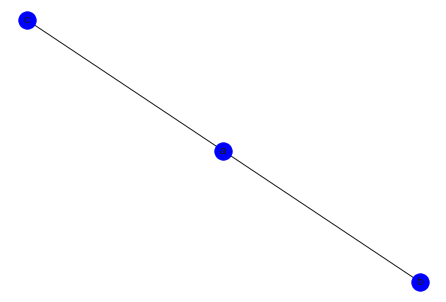

In [146]:
# 네트워크 nx예제
G = nx.Graph()  # 그래프 인스턴스 생성
G.add_node('a', weight = 1) #a 노드 생성
G.add_nodes_from(['b','c']) # b,c 노드 생성
edges = [('a','b'), ('a','c')]
G.add_edges_from(edges)

nx.draw(G, node_color = 'blue', with_labels = True) # 그래프 그리기

In [147]:
total_words.head()

,sup_word,sub_word1,sub_word2,sub_word3
0,산재보험,근재보험,상해보험,운전자보험
1,산재보험,근재보험,상해보험,실비보험
2,산재보험,근재보험,상해보험,화재보험
3,산재보험,근재보험,상해보험,생명보험
4,산재보험,근재보험,상해보험,손해보험


In [148]:
word_dict = {}
for col in total_words.columns:
    word_dict[col] = []
    word_dict[col].append(set(total_words[col].values))
    
    

In [149]:
total_words_set = set()
for key in word_dict.keys():
    total_words_set = total_words_set | word_dict[key][0]
    


In [150]:
num_to_words = {}
for i in range(len(total_words_set)):
    num_to_words[i] = list(total_words_set)[i]

In [151]:
num_to_words # 숫자 입력하면 단어 

{0: '천안 고용노동부',
 1: '2020년 건강보험료',
 2: '산재 고용보험 유예',
 3: '건설업 산재보험료 계산',
 4: '삼성생명 보험종류',
 5: '4대보험 회사부담비율',
 6: '2016년 건강보험료율',
 7: '광진구 시설관리공단',
 8: '산업재해 보상보험',
 9: '산재 기간중 퇴직금',
 10: '안전관리비 요율',
 11: '산재전문 변호사',
 12: '고용보험 납부내역서',
 13: '근로복지공단 산재관련문의',
 14: '국민건강보험공단 홈페이지',
 15: '일용근로자 보수총액 신고',
 16: '간병비 보험 추천',
 17: '2019년 산재보험료율',
 18: '식당 산재보험요율',
 19: '산업재해 보상보험 집행절차',
 20: '한화손해보험 실비 청구서류',
 21: '4대보험 토탈징수',
 22: '건강보험 EDI서비스',
 23: '상해보험 추천',
 24: '2019년 산업안전보건법',
 25: '연장수당 계산방법',
 26: '건강보험공단 홈페이지',
 27: '건강보험 토탈서비스',
 28: '건강연금보험료 완납증명서',
 29: '퇴직연금 공단',
 30: '공상처리 합의서',
 31: '4대사회보험징수포털 사이트',
 32: '전문건설협회',
 33: '임금 체납',
 34: '이직확인서 처리여부 조회',
 35: '4대보험',
 36: '창원 근로복지공단',
 37: '장애인고용공단 채용',
 38: '대구 고용보험 홈페이지',
 39: '고용보험 환급방법',
 40: 'db 손해보험 광고 모델',
 41: '학생 단체보험',
 42: '고용보험센터 근무시간',
 43: '전문건설공제조합 이사장',
 44: '건강보험 edi 상실신고',
 45: '고용보험 가입이력조회',
 46: '사업자등록번호 조회',
 47: '고용.산재 보수총액 신고',
 48: '인터넷지로 통합납부서비스',
 49: '부산 국민연금공단',
 50: '현대해상 보험금청구',
 51: '임금체불 민사소송 기간',
 52

In [152]:
words_to_num = {v:k for k,v in num_to_words.items()}

In [153]:
words_to_num # 단어 입력하면 숫자 

{'천안 고용노동부': 0,
 '2020년 건강보험료': 1,
 '산재 고용보험 유예': 2,
 '건설업 산재보험료 계산': 3,
 '삼성생명 보험종류': 4,
 '4대보험 회사부담비율': 5,
 '2016년 건강보험료율': 6,
 '광진구 시설관리공단': 7,
 '산업재해 보상보험': 8,
 '산재 기간중 퇴직금': 9,
 '안전관리비 요율': 10,
 '산재전문 변호사': 11,
 '고용보험 납부내역서': 12,
 '근로복지공단 산재관련문의': 13,
 '국민건강보험공단 홈페이지': 14,
 '일용근로자 보수총액 신고': 15,
 '간병비 보험 추천': 16,
 '2019년 산재보험료율': 17,
 '식당 산재보험요율': 18,
 '산업재해 보상보험 집행절차': 19,
 '한화손해보험 실비 청구서류': 20,
 '4대보험 토탈징수': 21,
 '건강보험 EDI서비스': 22,
 '상해보험 추천': 23,
 '2019년 산업안전보건법': 24,
 '연장수당 계산방법': 25,
 '건강보험공단 홈페이지': 26,
 '건강보험 토탈서비스': 27,
 '건강연금보험료 완납증명서': 28,
 '퇴직연금 공단': 29,
 '공상처리 합의서': 30,
 '4대사회보험징수포털 사이트': 31,
 '전문건설협회': 32,
 '임금 체납': 33,
 '이직확인서 처리여부 조회': 34,
 '4대보험': 35,
 '창원 근로복지공단': 36,
 '장애인고용공단 채용': 37,
 '대구 고용보험 홈페이지': 38,
 '고용보험 환급방법': 39,
 'db 손해보험 광고 모델': 40,
 '학생 단체보험': 41,
 '고용보험센터 근무시간': 42,
 '전문건설공제조합 이사장': 43,
 '건강보험 edi 상실신고': 44,
 '고용보험 가입이력조회': 45,
 '사업자등록번호 조회': 46,
 '고용.산재 보수총액 신고': 47,
 '인터넷지로 통합납부서비스': 48,
 '부산 국민연금공단': 49,
 '현대해상 보험금청구': 50,
 '임금체불 민사소송 기간': 51,
 '국

In [154]:
change_dict = {}
for col in total_words.columns:
    change_dict[col] = []
    for word in total_words[col]:
        change_dict[col].append(words_to_num[word])

In [156]:
total_words_num = pd.DataFrame(change_dict)
total_words_num.head()

,sup_word,sub_word1,sub_word2,sub_word3
0,1328,694,569,266
1,1328,694,569,1187
2,1328,694,569,572
3,1328,694,569,731
4,1328,694,569,1435


In [157]:
total_words_num

,sup_word,sub_word1,sub_word2,sub_word3
0,1328,694,569,266
1,1328,694,569,1187
2,1328,694,569,572
3,1328,694,569,731
4,1328,694,569,1435
...,...,...,...,...
31051,1328,2010,1558,1487
31052,1328,2010,1558,8
31053,1328,2010,1558,1685
31054,1328,2010,1558,578


In [210]:
def netword_drawing(total_words):
    
    import networkx as nx
    # 한글폰트 설정
    import matplotlib.font_manager as fm
    
    #fp1 = fm.FontProperties(fname='')
    #nx.set_fontproperties(fp1) #-> window 10에서 pygraphviz 모듈이 설치되지 않는 문제로 인해 사용불가
    
    # 네트워크 생성
    G = nx.Graph()
    
    for sup in list(set(total_words['sup_word'].values)):
        G.add_node(sup)
        temp_df1 = total_words[total_words['sup_word'] ==sup]
        for sub1 in list(set(temp_df1['sub_word1'].values)):
            G.add_node(sub1)
            G.add_edge(sup,sub1)
            temp_df2= temp_df1[temp_df1['sub_word1'] == sub1]
            for sub2 in list(set(temp_df2['sub_word2'].values)):
                G.add_node(sub2)
                G.add_edge(sub1, sub2)
                temp_df3 = temp_df2[temp_df2['sub_word2'] == sub2]
                for sub3 in list(set(temp_df3['sub_word3'].values)):
                    G.add_node(sub3)
                    G.add_edge(sub2,sub3)
                    

    
    color_map = [] # 노드의 색깔을 지정해주기 위한 리스트
    for node in G:
        if node=='694':
            color_map.append('red')
        elif node in list(set(total_words_num['sub_word1'].values)):
            color_map.append('blue')
        else:
            color_map.append('green')

        


    plt.figure(figsize=(30,30))
    d = dict(G.degree) # degree에 따른 node 크기 구별

    nx.draw(G, nodelist= d.keys(), node_size= [v*100 for v in d.values()],with_labels = True)#,node_color = color_map)
    # nx.draw_networkx(G, pos = nx.drawing.nx_agraph.graphviz_layout(G,prog= 'dot'))  : top to bottom 형식으로 그래프 도식화 windows 10에서는 안됌!
    plt.axis('off')
    plt.savefig('networx_picture2.jpg')
    plt.show()

* 위의 포문은 사용한 단어 데이터프레임 컬럼이 4개라 네번 반복되는 모양새 입니다. 하지만 이 부분은 크롤링 횟수에 따라서 계속 변경해주어야 하는 문제가 발생합니다. 따라서 데이터 프레임 컬럼의 길이에 따라 반복문 횟수를 조절해서 시행해주는 코드로 바꿔주시면 좀더 효율적인 코드가 될 것 같습니다. 

In [211]:
'''

color_map = [] # 노드의 색깔을 지정해주기 위한 리스트
for node in G:
    if node==690:
        color_map.append('red')
    elif node in list()


plt.figure(figsize=(30,30))
d = dict(G.degree) # degree에 따른 node 크기 구별

nx.draw(G, nodelist= d.keys(), node_size= [v*100 for v in d.values()],with_labels = True)#,node_color = color_map)
# nx.draw_networkx(G, pos = nx.drawing.nx_agraph.graphviz_layout(G,prog= 'dot'))  : top to bottom 형식으로 그래프 도식화 windows 10에서는 안됌!
plt.axis('off')
plt.show()
'''

"\n\ncolor_map = [] # 노드의 색깔을 지정해주기 위한 리스트\nfor node in G:\n    if node==690:\n        color_map.append('red')\n    elif node in list()\n\n\nplt.figure(figsize=(30,30))\nd = dict(G.degree) # degree에 따른 node 크기 구별\n\nnx.draw(G, nodelist= d.keys(), node_size= [v*100 for v in d.values()],with_labels = True)#,node_color = color_map)\n# nx.draw_networkx(G, pos = nx.drawing.nx_agraph.graphviz_layout(G,prog= 'dot'))  : top to bottom 형식으로 그래프 도식화 windows 10에서는 안됌!\nplt.axis('off')\nplt.show()\n"

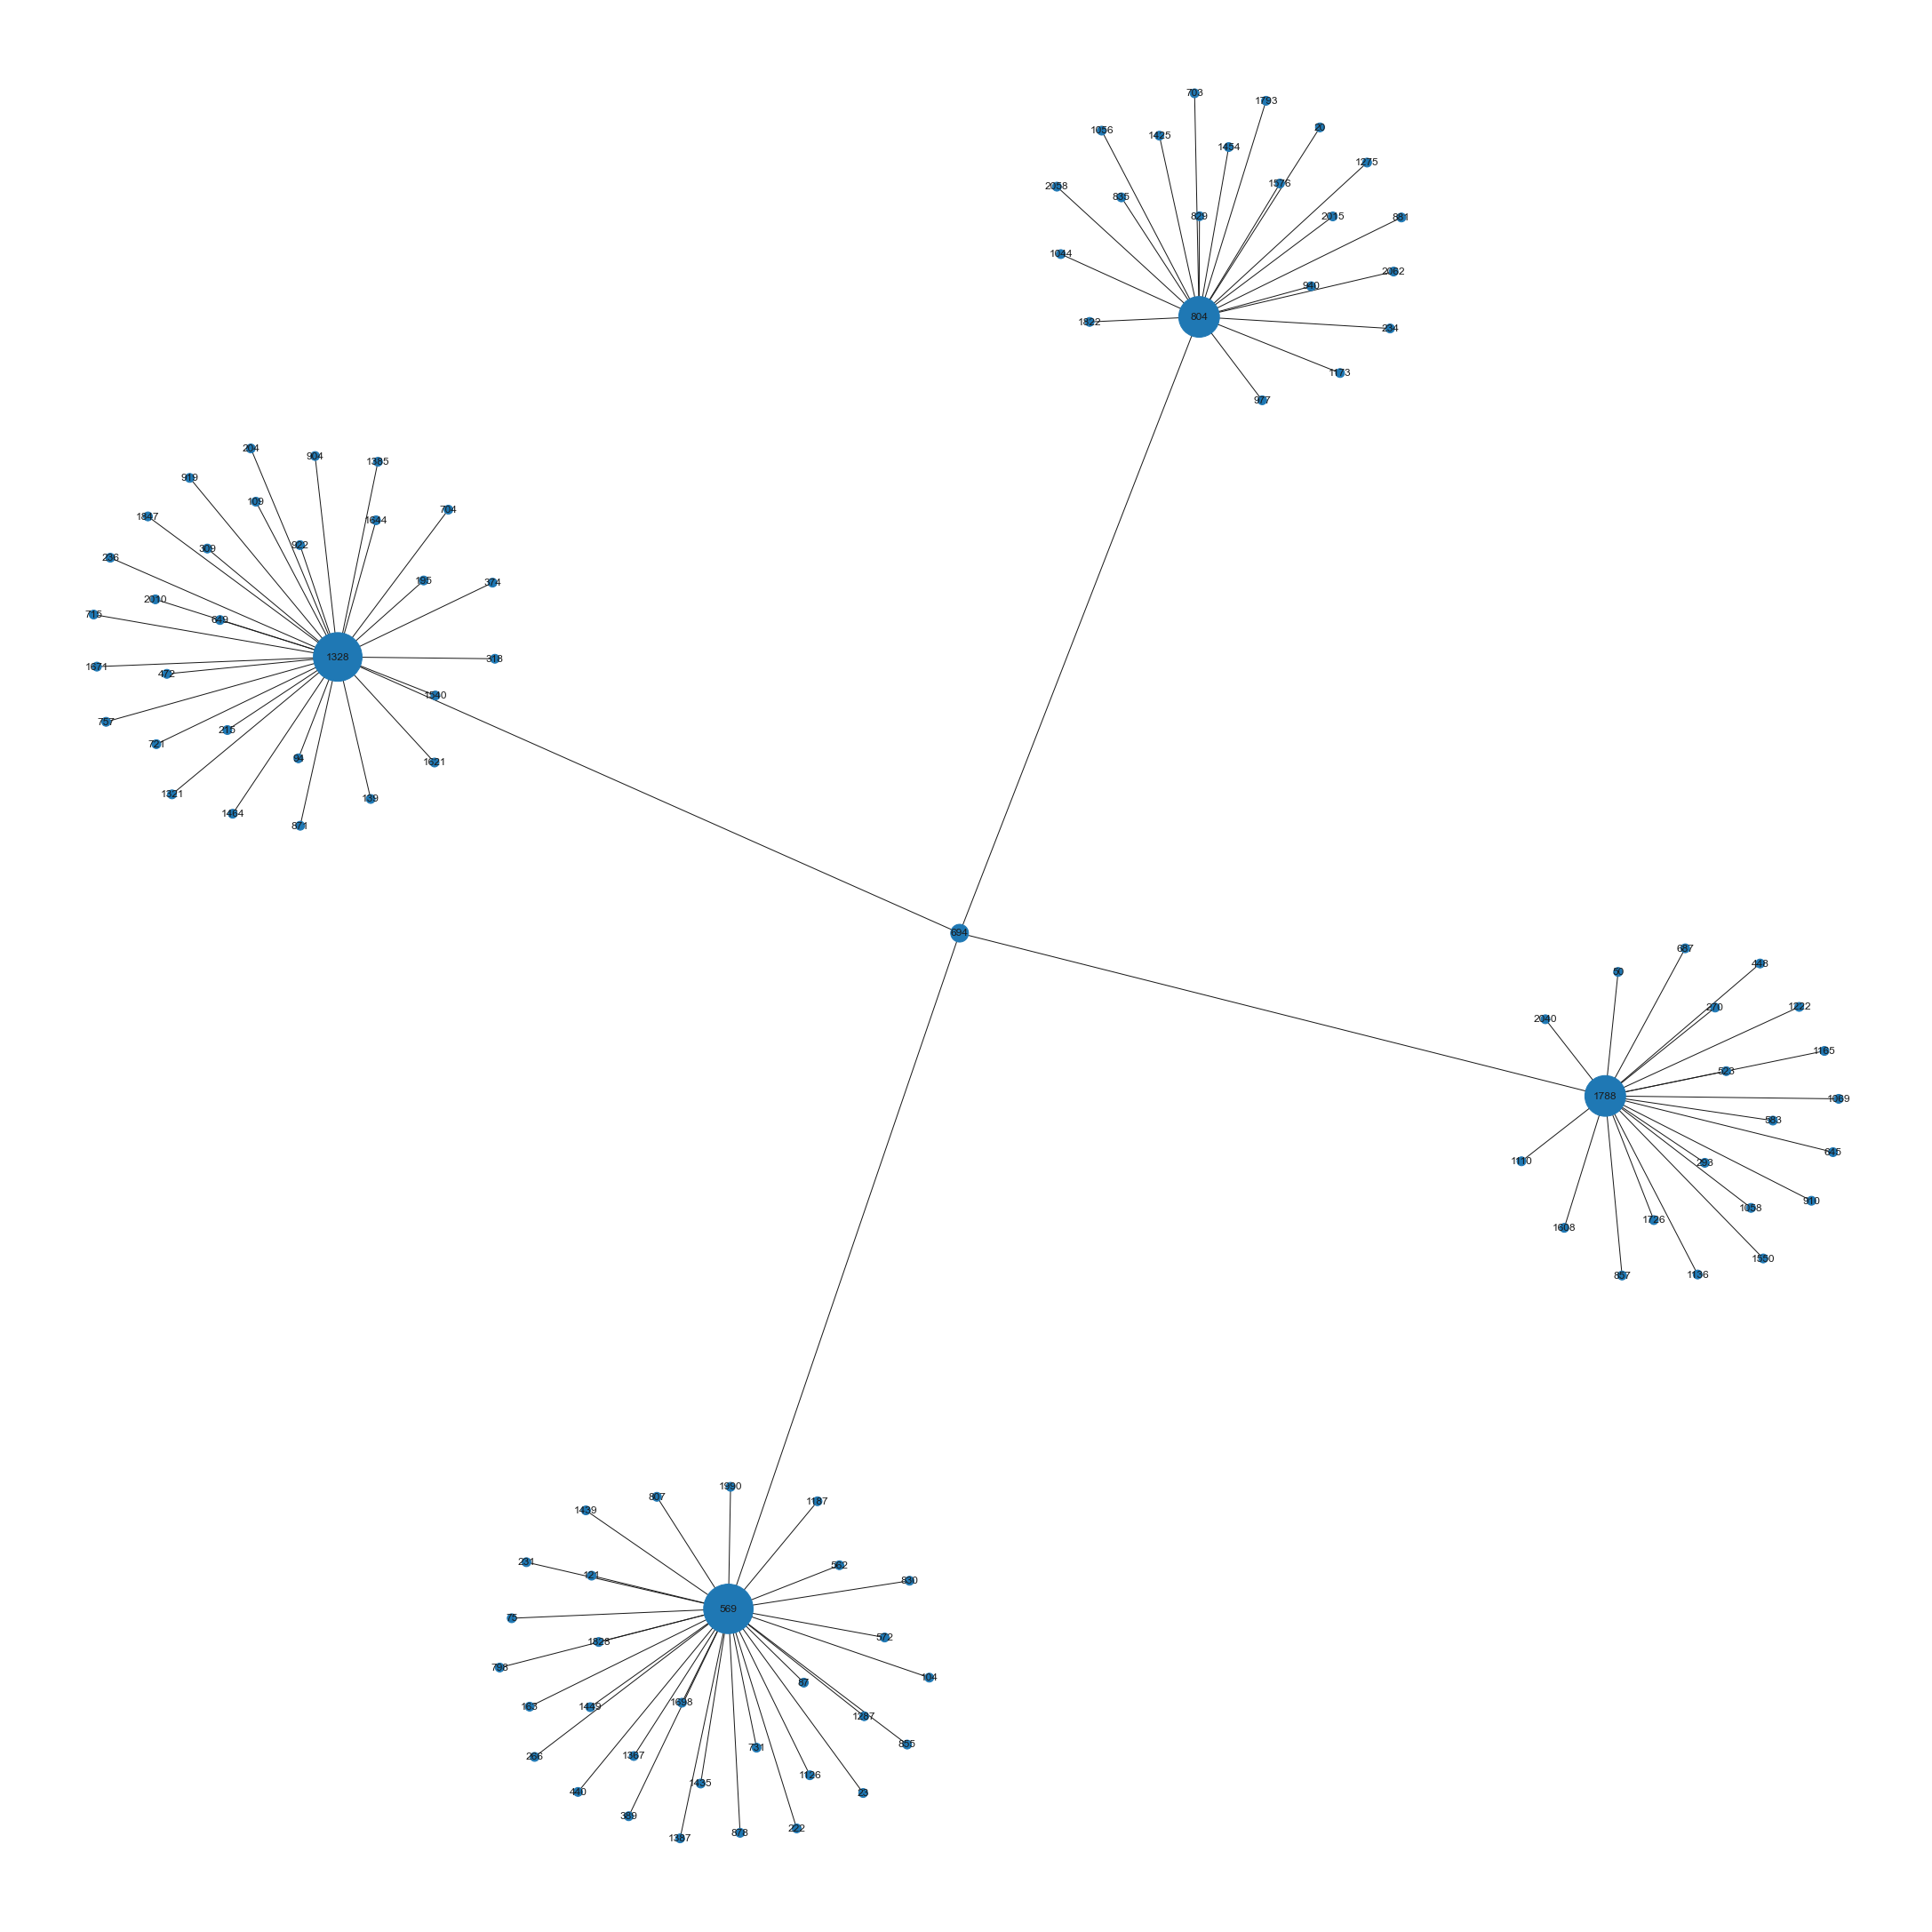

In [212]:
netword_drawing(total_words_num.loc[:len(total_words_num)/100])

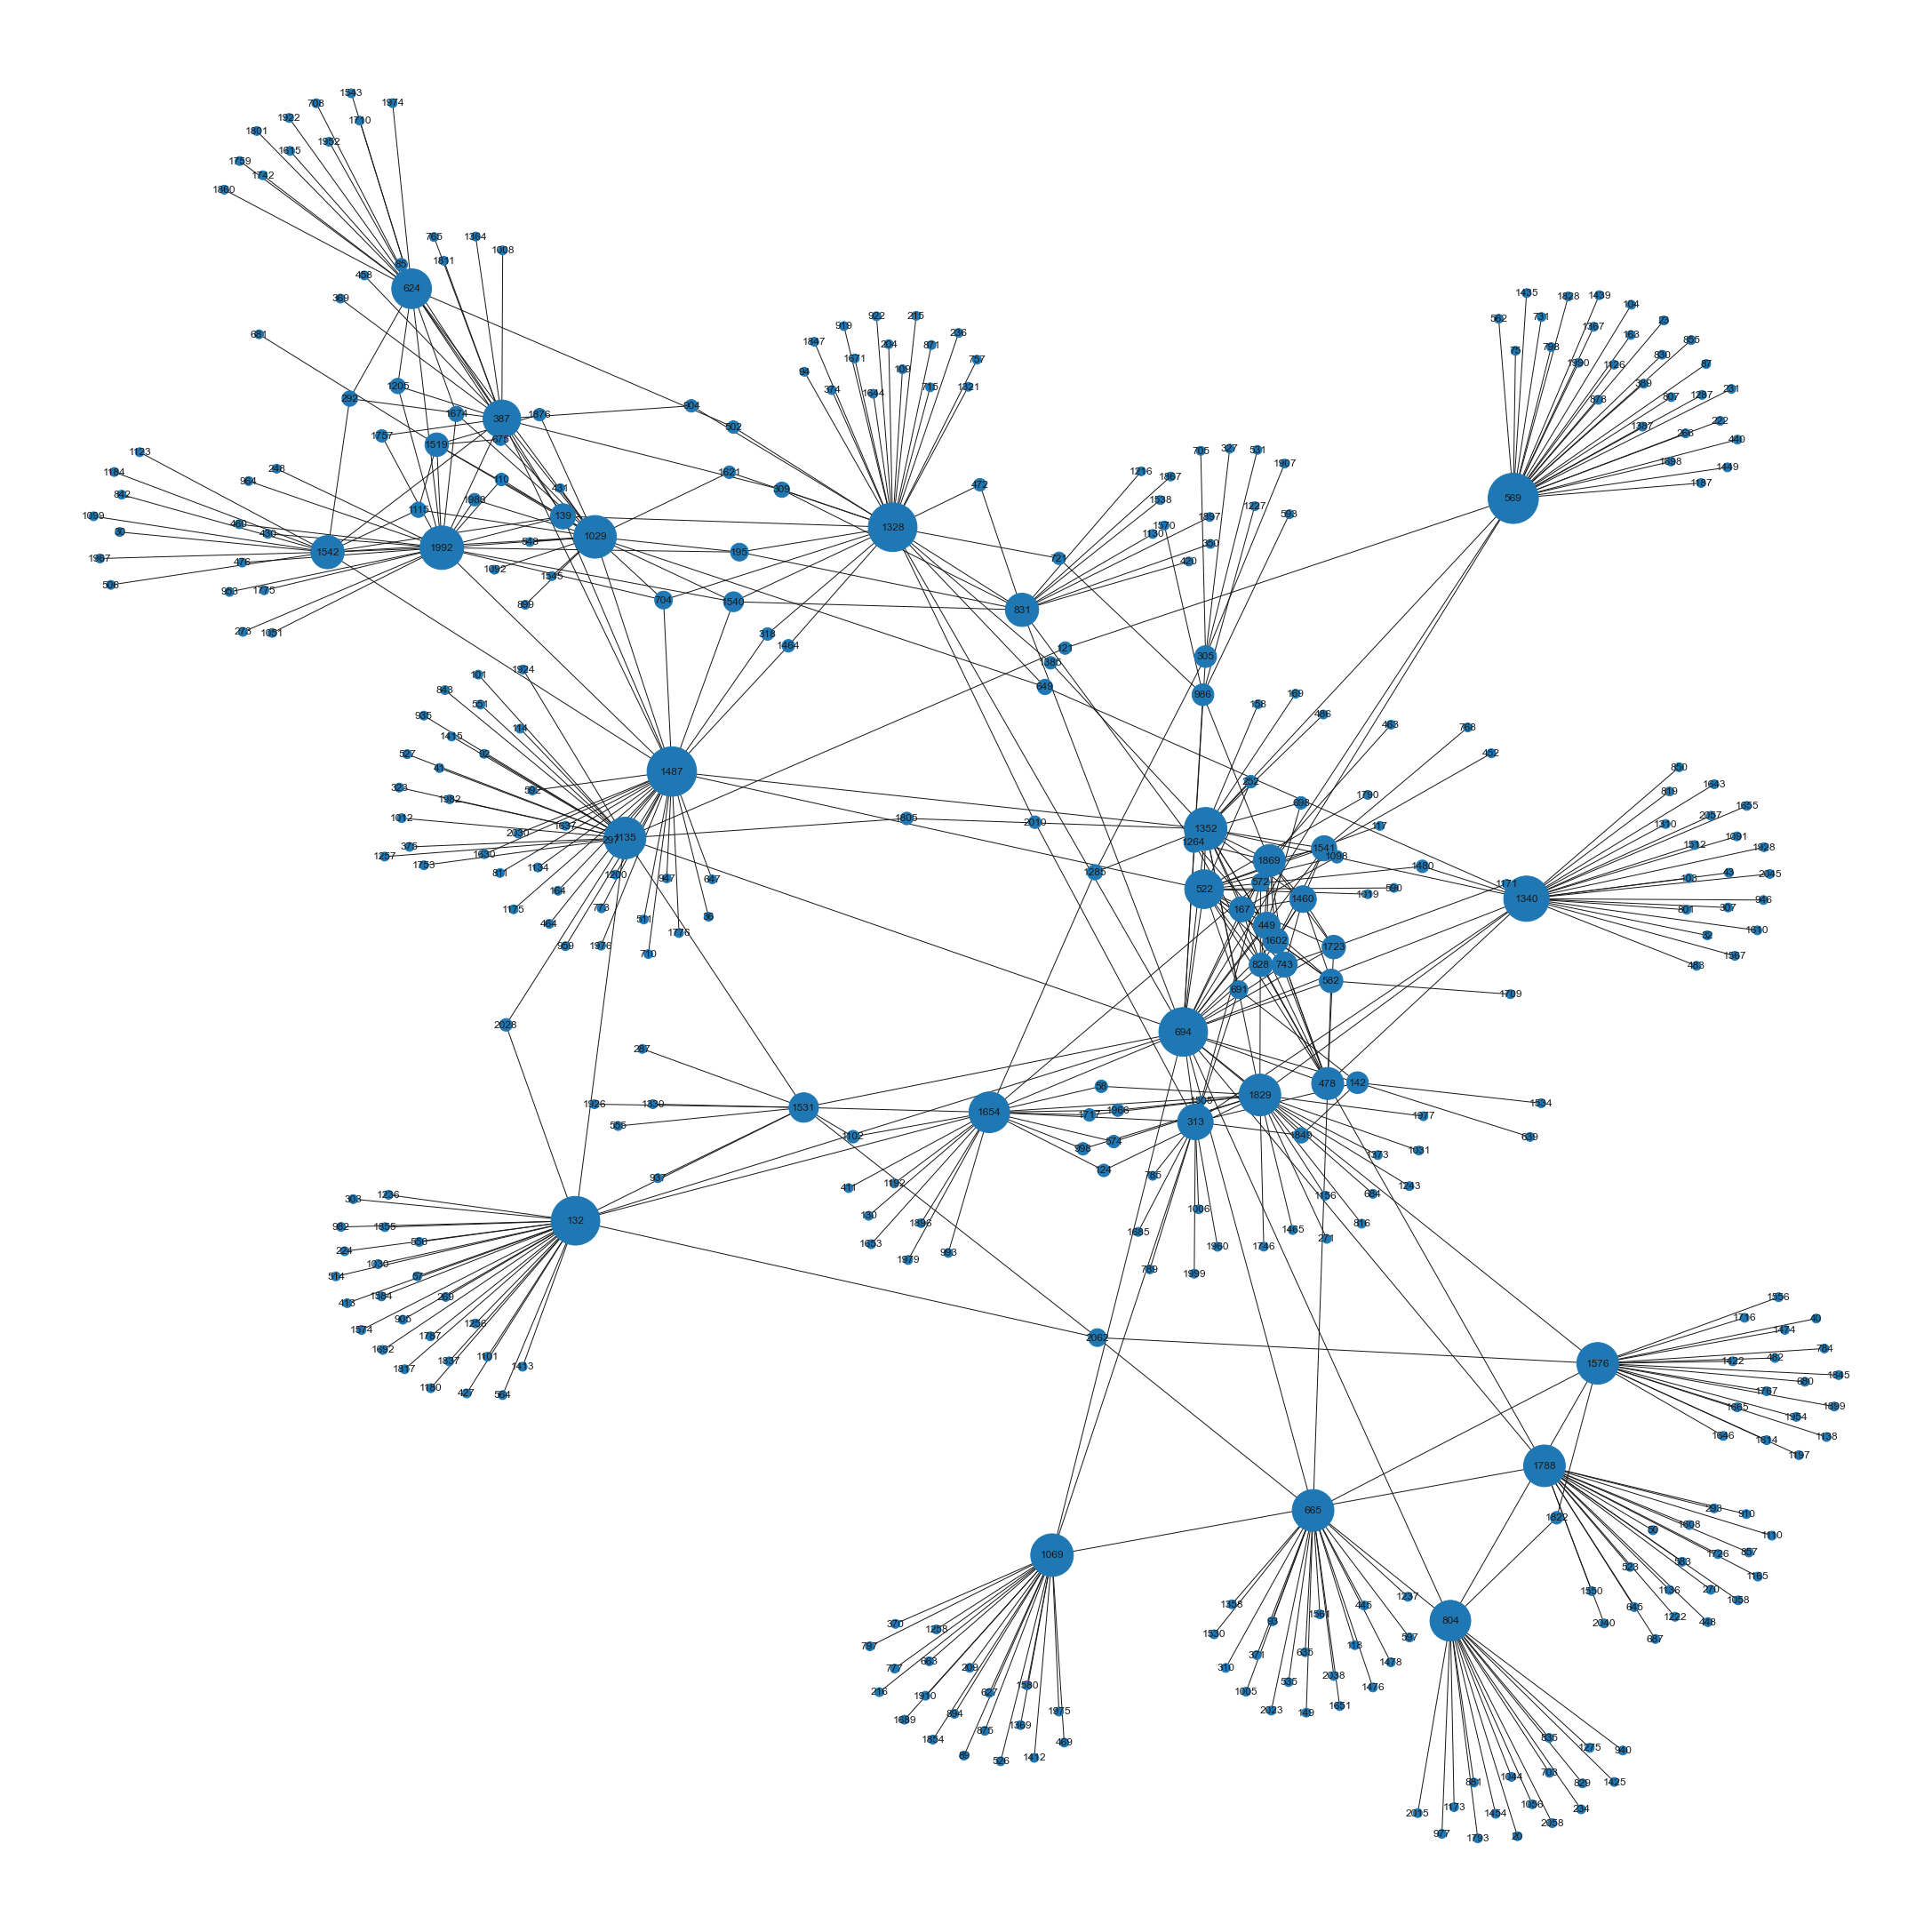

In [201]:
netword_drawing(total_words_num.loc[:len(total_words_num)/10])

G.degree 는 각 노드의 연결 횟수를 반환합니다. 하지만 최신버전부터 dictionary 형태로 반환되지 않기 때문에 dict(G.degree) 로 저장을 해서 nodelist = d.keys() 에 넘겨주도록 합니다. 이를 통해 각 노드의 연결횟수에 따라 노드의 크기를 자동으로 지정할 수 있습니다. 

아래는 결과물입니다.

* 400개만 시각화 (4천개는 너무 많아 10분의 1로 줄여서 시각화 하였습니다)  -- 우리껀 3000개임

red: sup_word
blue: sub_word1
green: sub_word2, sub_word3